<a href="https://colab.research.google.com/github/yx8668/Quantconnct-AlgoTrading-Strategy/blob/main/Python_Plot_Alpha_SMA_%26_BB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#pip install TA-Lib
!pip install yfinance
!pip install mpl_finance

     |████████████████████████████████| 6.3MB 10.0MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.61-py2.py3-none-any.whl size=23818 sha256=9c179bc87e9f21ef1efd4a6deed36a555c957dd58b8a0dccef9e8cc4a05c3339
  Stored in directory: /root/.cache/pip/wheels/9c/b3/31/b5f2bcf2e3fd3f42e5ca1a3d20ada27eae8cbda7de75a5a2a0
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
#import libraries

import pandas as pd
import numpy as np
import yfinance as yf
yf.pdr_override()

import pandas_datareader.data as pdr
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

#from mpl_finance import candlestick_ohlc






In [ ]:
#set stocks
blackberry = pdr.DataReader('BB', data_source='yahoo', start='2016-6-1', end='2021-6-1')
ford = pdr.DataReader('F', data_source='yahoo', start='2016-06-01', end='2021-06-01')

print(blackberry, ford)




[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
             Open   High   Low  Close  Adj Close     Volume
Date                                                       
2016-06-01   7.22   7.30  7.20   7.25       7.25    3125600
2016-06-02   7.21   7.33  7.21   7.31       7.31    2450800
2016-06-03   7.30   7.34  7.16   7.26       7.26    3379900
2016-06-06   7.27   7.43  7.26   7.40       7.40    2778000
2016-06-07   7.37   7.47  7.37   7.43       7.43    3000900
...           ...    ...   ...    ...        ...        ...
2021-05-24   8.56   8.67  8.46   8.62       8.62    4336500
2021-05-25   8.64   8.70  8.47   8.59       8.59    7590900
2021-05-26   8.79   9.60  8.69   9.44       9.44   26504900
2021-05-27   9.70  10.15  9.25   9.97       9.97   45662100
2021-05-28  10.31  12.09  9.94  10.07      10.07  116292700

[1258 rows x 6 columns]              Open   High    Low  Close  Adj Close     Vol

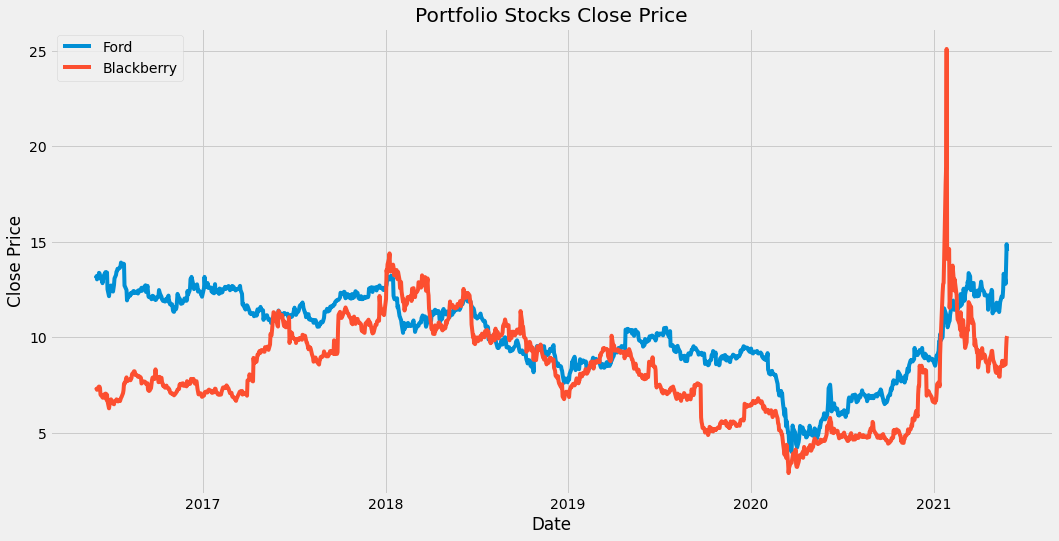

In [ ]:
#plot stocks historical prices
plt.figure(figsize=(16,8))
plt.title('Portfolio Stocks Close Price')
plt.plot(ford['Close'], label='Ford')
plt.plot(blackberry['Close'], label='Blackberry')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend(loc='upper left')
plt.show()





In [ ]:
#plot SMA 7days and 21days for Ford

ford_SMA7 = pd.DataFrame()
ford_SMA21 = pd.DataFrame()
ford_SMA7['Close'] = ford['Close'].rolling(window=7).mean()
ford_SMA21['Close'] = ford['Close'].rolling(window=21).mean()

print(ford_SMA7, ford_SMA21)




                Close
Date                 
2016-06-01        NaN
2016-06-02        NaN
2016-06-03        NaN
2016-06-06        NaN
2016-06-07        NaN
...               ...
2021-05-24  12.445714
2021-05-25  12.584286
2021-05-26  12.834286
2021-05-27  13.225714
2021-05-28  13.571429

[1258 rows x 1 columns]                 Close
Date                 
2016-06-01        NaN
2016-06-02        NaN
2016-06-03        NaN
2016-06-06        NaN
2016-06-07        NaN
...               ...
2021-05-24  11.975714
2021-05-25  12.001429
2021-05-26  12.068571
2021-05-27  12.185238
2021-05-28  12.340952

[1258 rows x 1 columns]


In [ ]:
#plot SMA 7days and 21days for blackberry
bb_SMA7 = pd.DataFrame()
bb_SMA21 = pd.DataFrame()
bb_SMA7['Close'] = blackberry['Close'].rolling(window=7).mean()
bb_SMA21['Close'] = blackberry['Close'].rolling(window=21).mean()

print(bb_SMA7, bb_SMA21)

               Close
Date                
2016-06-01       NaN
2016-06-02       NaN
2016-06-03       NaN
2016-06-06       NaN
2016-06-07       NaN
...              ...
2021-05-24  8.594286
2021-05-25  8.615714
2021-05-26  8.751429
2021-05-27  8.922857
2021-05-28  9.141429

[1258 rows x 1 columns]                Close
Date                
2016-06-01       NaN
2016-06-02       NaN
2016-06-03       NaN
2016-06-06       NaN
2016-06-07       NaN
...              ...
2021-05-24  8.565238
2021-05-25  8.541429
2021-05-26  8.548571
2021-05-27  8.580476
2021-05-28  8.628571

[1258 rows x 1 columns]


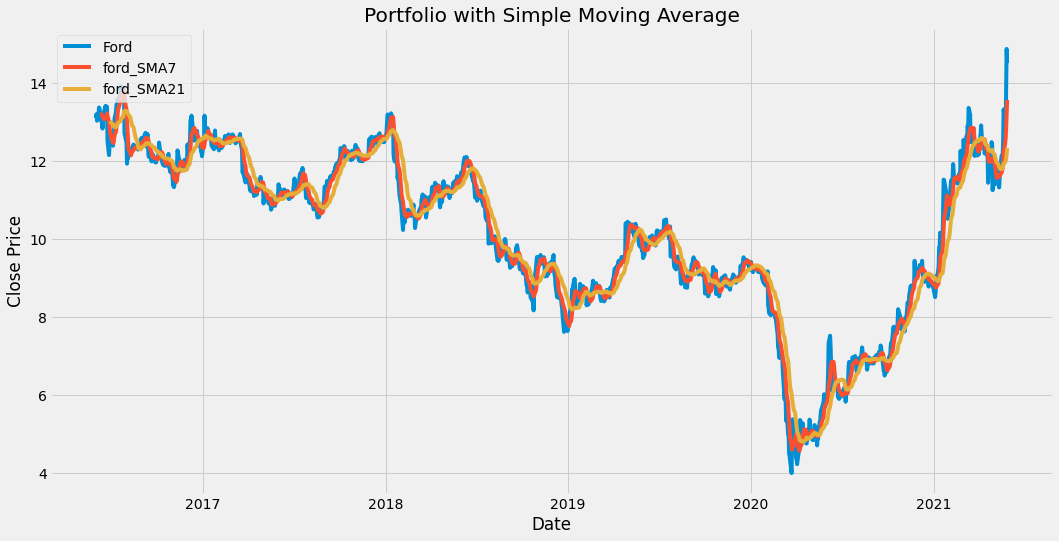

In [ ]:
#plot stocks with SMA7 & SMA21
plt.figure(figsize=(16,8))
plt.title('Portfolio with Simple Moving Average')
plt.plot(ford['Close'], label='Ford')
plt.plot(ford_SMA7['Close'], label='ford_SMA7')
plt.plot(ford_SMA21['Close'], label='ford_SMA21')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend(loc='upper left')
plt.show()






In [ ]:
#create new dataframe to store all data for Ford
data = pd.DataFrame()
data['ford'] = ford['Close']
data['ford_SMA7'] = ford_SMA7['Close']
data['ford_SMA21'] = ford_SMA21['Close']

data

,ford,ford_SMA7,ford_SMA21
Date,,,
2016-06-01,13.11,NaN,NaN
2016-06-02,13.21,NaN,NaN
2016-06-03,13.04,NaN,NaN
2016-06-06,13.18,NaN,NaN
2016-06-07,13.38,NaN,NaN
...,...,...,...
2021-05-24,13.06,12.445714,11.975714
2021-05-25,12.81,12.584286,12.001429
2021-05-26,13.90,12.834286,12.068571


In [ ]:
#create buy and sell signal
def buy_sell(data):
  buy_signal_price = []
  sell_signal_price = []
  flag = -1

  for i in range(len(data)):
    if data['ford_SMA7'][i] > data['ford_SMA21'][i]:
      if flag != 1:
        buy_signal_price.append(data['ford'][i])
        sell_signal_price.append(np.nan)
        flag = 1
      else:
        buy_signal_price.append(np.nan)
        sell_signal_price.append(np.nan)
    elif data['ford_SMA7'][i] < data['ford_SMA21'][i]:
      if flag != 0:
        buy_signal_price.append(np.nan)
        sell_signal_price.append(data['ford'][i])
        flag = 0
      else:
        buy_signal_price.append(np.nan)
        sell_signal_price.append(np.nan)
    else:
      buy_signal_price.append(np.nan)
      sell_signal_price.append(np.nan)

  return (buy_signal_price, sell_signal_price)





     

In [ ]:
#set variable for buy sell data
buy_sell = buy_sell(data)
data['buying_signal'] = buy_sell[0]
data['selling_signal'] = buy_sell[1]
                  
data


,ford,ford_SMA7,ford_SMA21,buying_signal,selling_signal
Date,,,,,
2016-06-01,13.11,NaN,NaN,NaN,NaN
2016-06-02,13.21,NaN,NaN,NaN,NaN
2016-06-03,13.04,NaN,NaN,NaN,NaN
2016-06-06,13.18,NaN,NaN,NaN,NaN
2016-06-07,13.38,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2021-05-24,13.06,12.445714,11.975714,NaN,NaN
2021-05-25,12.81,12.584286,12.001429,NaN,NaN
2021-05-26,13.90,12.834286,12.068571,NaN,NaN


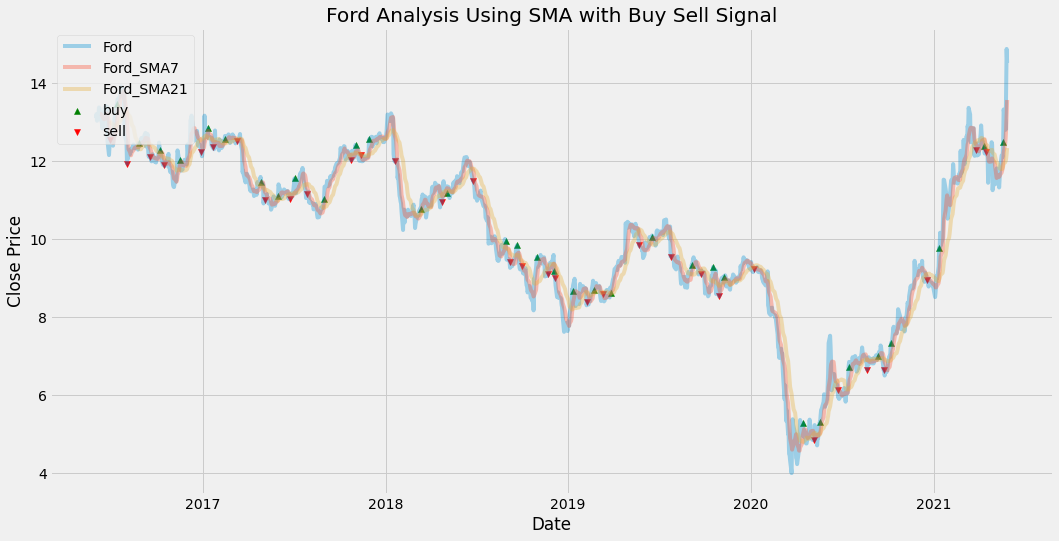

In [ ]:
#plot buy sell signal
plt.figure(figsize=(16,8))
plt.plot(data['ford'],label='Ford',alpha=0.35)
plt.plot(data['ford_SMA7'],label='Ford_SMA7', alpha=0.35)
plt.plot(data['ford_SMA21'],label='Ford_SMA21', alpha=0.35)
plt.scatter(data.index, data['buying_signal'],label='buy', marker='^', color='green', alpha=1)
plt.scatter(data.index, data['selling_signal'],label='sell',marker='v',color='red', alpha=1)
plt.title('Ford Analysis Using SMA with Buy Sell Signal')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend(loc='upper left')
plt.show()






In [ ]:
#setting for bollinger band
BBand_MA = pd.DataFrame()
BBand_STD = pd.DataFrame()
BBand_Upper = pd.DataFrame()
BBand_Lower = pd.DataFrame()


BBand_MA['Close'] = ford['Close'].rolling(window=20).mean()
BBand_STD['Close']= ford['Close'].rolling(window=20).std()
BBand_Upper = BBand_MA + 2*BBand_STD
BBand_Lower = BBand_MA - 2*BBand_STD

print(BBand_MA, BBand_Upper, BBand_Lower)





              Close
Date               
2016-06-01      NaN
2016-06-02      NaN
2016-06-03      NaN
2016-06-06      NaN
2016-06-07      NaN
...             ...
2021-05-24  11.9610
2021-05-25  11.9770
2021-05-26  12.0505
2021-05-27  12.2315
2021-05-28  12.3810

[1258 rows x 1 columns]                 Close
Date                 
2016-06-01        NaN
2016-06-02        NaN
2016-06-03        NaN
2016-06-06        NaN
2016-06-07        NaN
...               ...
2021-05-24  13.086324
2021-05-25  13.142380
2021-05-26  13.489483
2021-05-27  14.098761
2021-05-28  14.479600

[1258 rows x 1 columns]                 Close
Date                 
2016-06-01        NaN
2016-06-02        NaN
2016-06-03        NaN
2016-06-06        NaN
2016-06-07        NaN
...               ...
2021-05-24  10.835676
2021-05-25  10.811620
2021-05-26  10.611517
2021-05-27  10.364239
2021-05-28  10.282400

[1258 rows x 1 columns]


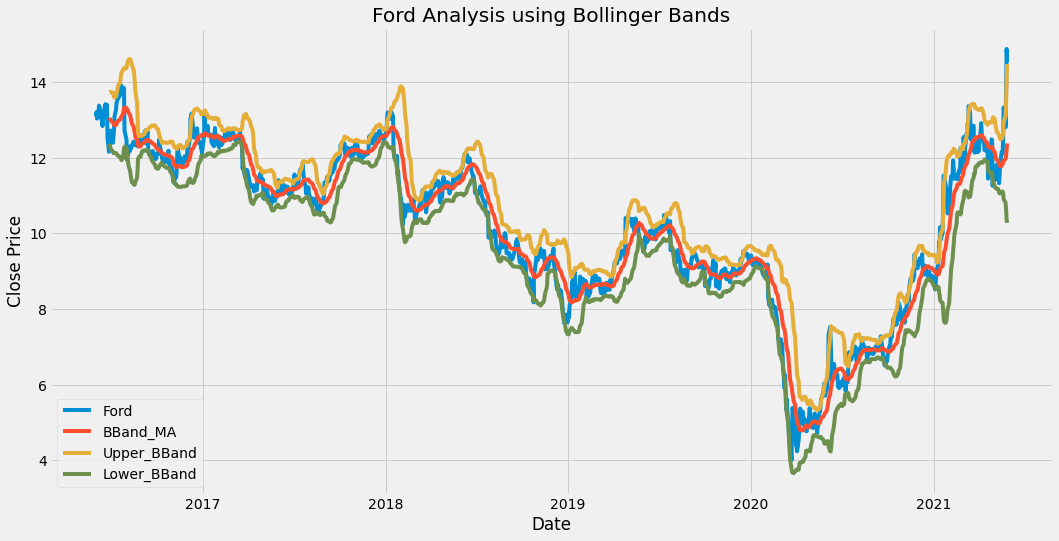

In [ ]:
#plot Bollinger Band for Ford
plt.figure(figsize=(16,8))
plt.title('Ford Analysis using Bollinger Bands')
plt.plot(ford['Close'], label='Ford')
plt.plot(BBand_MA['Close'], label='BBand_MA')
plt.plot(BBand_Upper, label='Upper_BBand')
plt.plot(BBand_Lower, label='Lower_BBand')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend(loc='best')
plt.show()

In [ ]:
#new dataframe to store BBand data for Ford
data = pd.DataFrame()
data['ford'] = ford['Close']
data['BBand_MA'] = BBand_MA['Close']
data['BBand_Upper'] = BBand_Upper
data['BBand_Lower'] = BBand_Lower
data['BBand_STD'] = BBand_STD['Close']

data





,ford,BBand_MA,BBand_Upper,BBand_Lower,BBand_STD
Date,,,,,
2016-06-01,13.11,NaN,NaN,NaN,NaN
2016-06-02,13.21,NaN,NaN,NaN,NaN
2016-06-03,13.04,NaN,NaN,NaN,NaN
2016-06-06,13.18,NaN,NaN,NaN,NaN
2016-06-07,13.38,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2021-05-24,13.06,11.9610,13.086324,10.835676,0.562662
2021-05-25,12.81,11.9770,13.142380,10.811620,0.582690
2021-05-26,13.90,12.0505,13.489483,10.611517,0.719492


In [ ]:
#create buy sell signal via Bollinger Bands
def buy_sell(data):
  buy_signal_price = []
  sell_signal_price = []
  flag = -1

  for i in range(len(data)):
    if data['ford'][i] > data['BBand_Upper'][i]:
      if flag != 1:
        buy_signal_price.append(data['ford'][i])
        sell_signal_price.append(np.nan)
        flag = 1
      else:
        buy_signal_price.append(np.nan)
        sell_signal_price.append(np.nan)
    elif data['ford'][i] < data['BBand_Lower'][i]:
      if flag != 0:
        buy_signal_price.append(np.nan)
        sell_signal_price.append(data['ford'][i])
        flag = 0
      else:
        buy_signal_price.append(np.nan)
        sell_signal_price.append(np.nan)
    else:
      buy_signal_price.append(np.nan)
      sell_signal_price.append(np.nan)
  
  return (buy_signal_price, sell_signal_price)









In [ ]:
#set variables for buy sell signal for bollinger bands
buy_sell = buy_sell(data)
data['Buying_Signal'] = buy_sell[0]
data['Selling_Signal'] = buy_sell[1]

data



,ford,BBand_MA,BBand_Upper,BBand_Lower,BBand_STD,Buying_Signal,Selling_Signal
Date,,,,,,,
2016-06-01,13.11,NaN,NaN,NaN,NaN,NaN,NaN
2016-06-02,13.21,NaN,NaN,NaN,NaN,NaN,NaN
2016-06-03,13.04,NaN,NaN,NaN,NaN,NaN,NaN
2016-06-06,13.18,NaN,NaN,NaN,NaN,NaN,NaN
2016-06-07,13.38,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2021-05-24,13.06,11.9610,13.086324,10.835676,0.562662,NaN,NaN
2021-05-25,12.81,11.9770,13.142380,10.811620,0.582690,NaN,NaN
2021-05-26,13.90,12.0505,13.489483,10.611517,0.719492,NaN,NaN


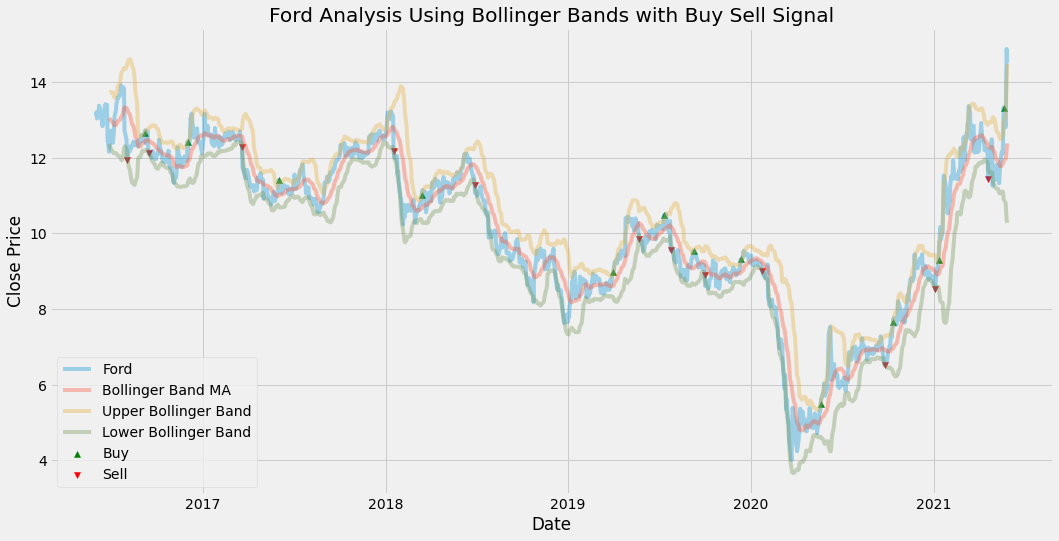

In [ ]:
#plot buy sell for bollinger bands
plt.figure(figsize=(16,8))
plt.title('Ford Analysis Using Bollinger Bands with Buy Sell Signal')
plt.plot(data['ford'], label='Ford', alpha=0.35)
plt.plot(data['BBand_MA'], label='Bollinger Band MA', alpha=0.35)
plt.plot(data['BBand_Upper'], label='Upper Bollinger Band', alpha=0.35)
plt.plot(data['BBand_Lower'], label='Lower Bollinger Band', alpha=0.35)
plt.scatter(data.index, data['Buying_Signal'], label='Buy', marker='^', color='green', alpha=1)
plt.scatter(data.index, data['Selling_Signal'], label='Sell', marker='v', color='red', alpha=1)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend(loc='best')
plt.show()





